<a href="https://colab.research.google.com/github/marioTavFer/DIO-MLS/blob/main/dio_binarizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image
import imageio.v3 as iio
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
#from scipy import ndimage


#exercicio de binarizacao com a imagem Lena
#seguindo a premissa do professor -> não usar algoritmo pronto


Text(0.5, 1.0, 'Lena Colorida')

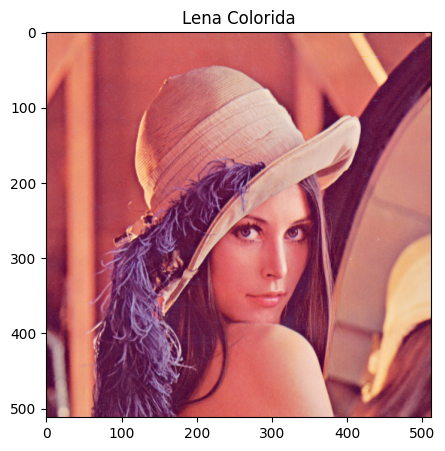

In [2]:
imagem =  Image.open('LENA3.png')
label = 'Lena Colorida'
plt.figure(figsize=(5, 5))
plt.imshow(imagem)
plt.title(label)

Text(0.5, 1.0, 'Lena Cinza1')

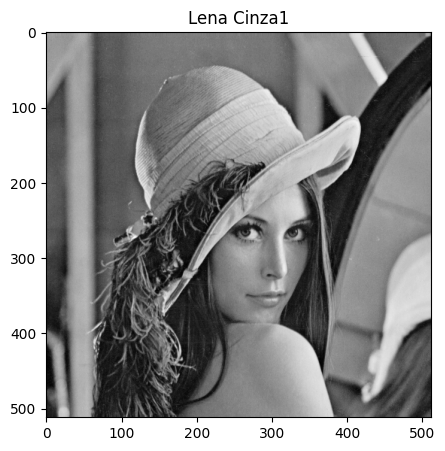

In [3]:
# convertendo para cinza - usando numpy
lena1cz = np.array(Image.open('LENA3.png').convert('L'))
plt.figure(figsize=(5, 5))
plt.imshow(lena1cz, cmap='gray' )
plt.title('Lena Cinza1')




Text(0.5, 1.0, 'Lena Cinza2')

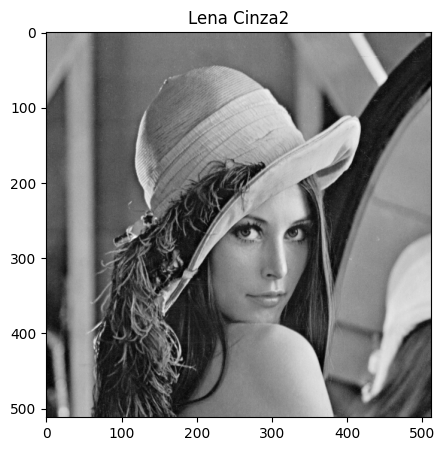

In [4]:
#convertendo para cinza - usando matplotlib ou imageio

#lena2cz = matplotlib.pyplot.imread('LENA3.png', format='L')

lena2cz = iio.imread('LENA3.png', pilmode='L')

plt.figure(figsize=(5, 5))
plt.imshow(lena2cz, cmap='gray')
plt.title('Lena Cinza2')

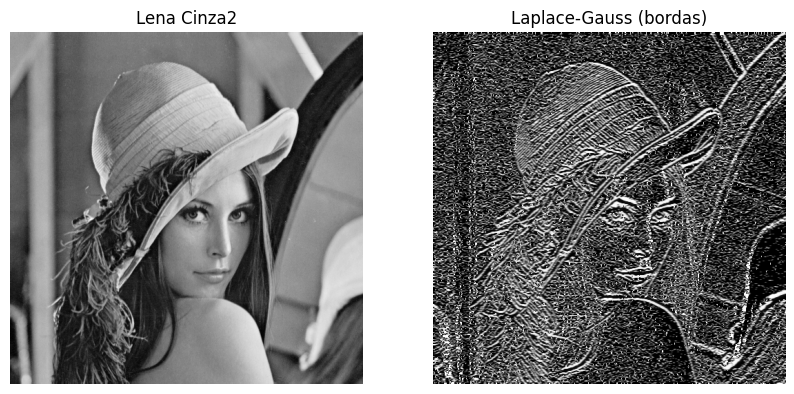

In [5]:
# usando filtro de Laplace para detetar as bordas
# tendo como referência documentação do numpy

lena2cz_lapace = scipy.ndimage.gaussian_laplace(lena2cz, sigma=1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

axes[0].set_title("Lena Cinza2")
axes[0].imshow(lena2cz, cmap="gray")
axes[1].set_title("Laplace-Gauss (bordas)")
axes[1].imshow(lena2cz_lapace, cmap="gray")
for i in axes:
    i.axis("off")
plt.show()

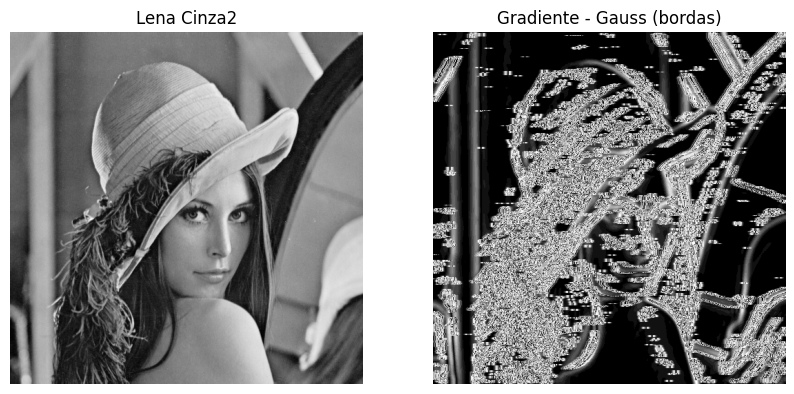

In [6]:
# usando filtro de Gauss (magnitude - gradiente) para detetar as bordas
# tendo como referência documentação do numpy

lena2cz_gauss = scipy.ndimage.gaussian_gradient_magnitude(lena2cz, sigma=3)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

axes[0].set_title("Lena Cinza2")
axes[0].imshow(lena2cz, cmap="gray")
axes[1].set_title("Gradiente - Gauss (bordas)")
axes[1].imshow(lena2cz_gauss, cmap="gray")
for i in axes:
    i.axis("off")
plt.show()

In [7]:
# processo de binarizacao
# a matriz da lena2cz é convertida para binario
# se o valor do pixel for maior que 0.1, o pixel é branco
# se o valor do pixel for menor que 0.1, o pixel é preto

ponto_treshold = 128
lena2cz_bin = lena2cz > ponto_treshold
print(lena2cz_bin)



[[ True  True  True ...  True  True False]
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [8]:
ponto_max = 255
lena2cz_binMax = (lena2cz > ponto_treshold)*ponto_max
print(lena2cz_binMax)

[[255 255 255 ... 255 255   0]
 [255 255 255 ... 255 255   0]
 [255 255 255 ... 255 255   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


Text(0.5, 1.0, 'Lena P&B')

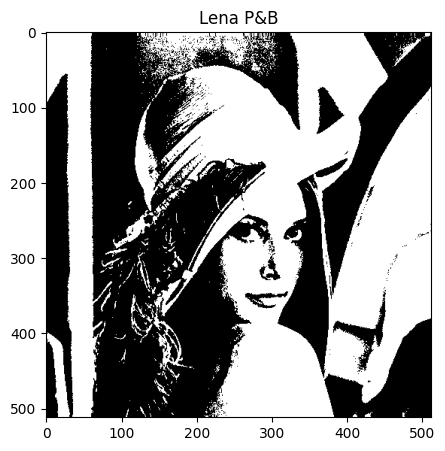

In [9]:
plt.figure(figsize=(5, 5))
plt.imshow(lena2cz_binMax, cmap='gray')
plt.title('Lena P&B')